<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")
train_data.head()
test_data.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price
0,1303772,Honda Vezel 1.5A X,honda,vezel,4614,2015.0,NaN,29-apr-2015,suv,parf car,...,9582.0,112000.0,19229.0,9229.0,NaN,NaN,uncategorized,"powerful 1.5l i-vtec engine producing 128bhp, ...","pioneer touch screen with reverse camera, 16"" ...",NaN
1,1323166,Mazda 3 1.6A SP (COE till 10/2027),mazda,3,extremely well maintained and in pristine cond...,2007.0,NaN,26-oct-2007,mid-sized sedan,"coe car, premium ad car, low mileage car",...,13644.0,120000.0,14347.0,15782.0,NaN,NaN,uncategorized,fuel efficient 1.6l 4-cylinder inline 16-valve...,"multi-function steering wheel, keyless entry, ...",NaN
2,1308405,MINI Cooper S Countryman 2.0A,mini,cooper,1 owner! beautiful island blue color! eurokars...,2019.0,NaN,27-mar-2020,sports car,parf car,...,54818.0,43000.0,39863.0,47809.0,NaN,NaN,uncategorized,"output of 141kw, 189bhp at 5000rpm to 6000rpm,...","18"" sports rims, sports leather seats, navigat...",NaN
3,1216706,Toyota Vios 1.5A G,toyota,vios,fully agent maintain! genuine low mileage at 5...,2019.0,NaN,28-jun-2019,mid-sized sedan,"parf car, premium ad car",...,26363.0,53300.0,15573.0,15573.0,NaN,NaN,uncategorized,"1.5l 4 cylinder 16 valves dohc vvt-i engine, 7...","push start button, toyota factory player, reve...",NaN
4,1298206,Mazda 3 HB 1.5A,mazda,3,workshop check/sta evaluation available. accid...,2015.0,NaN,19-nov-2015,hatchback,"parf car, premium ad car",...,15197.0,149000.0,18097.0,13097.0,NaN,NaN,uncategorized,1.5l 4 cylinder inline dohc 16 valves skyactiv...,factory fitted audio with audio & multi functi...,NaN


In [3]:
train_categorical=train_data.select_dtypes(include='object')
print(train_categorical.columns)
train_numerical = train_data.select_dtypes(include = ['float64', 'int64'])
print(train_numerical.columns)

Index(['title', 'make', 'model', 'description', 'original_reg_date',
       'reg_date', 'type_of_vehicle', 'category', 'transmission', 'fuel_type',
       'opc_scheme', 'lifespan', 'eco_category', 'features', 'accessories'],
      dtype='object')
Index(['listing_id', 'manufactured', 'curb_weight', 'power', 'engine_cap',
       'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value',
       'mileage', 'omv', 'arf', 'indicative_price', 'price'],
      dtype='object')


In [4]:
train_data.drop(['listing_id'],axis=1,inplace=True)
test_data.drop(['listing_id'],axis=1,inplace=True)

count    2.500000e+04
mean     1.151486e+05
std      1.555725e+05
min      7.000000e+02
25%      4.914100e+04
50%      7.888800e+04
75%      1.258000e+05
max      2.899999e+06
Name: price, dtype: float64


C:\Users\echo\AppData\Local\Temp\ipykernel_14264\1636453605.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['price'], color='Green', bins=200, hist_kws={'alpha': 0.4});


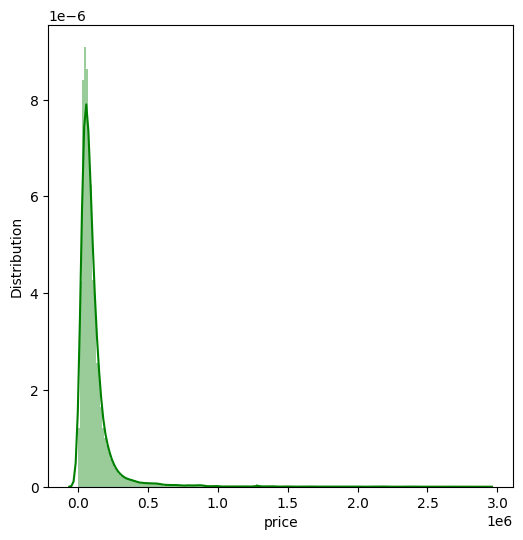

In [6]:
print(train_data['price'].describe())
plt.figure(figsize=(6, 6))
sns.distplot(train_data['price'], color='Green', bins=200, hist_kws={'alpha': 0.4});
plt.ylabel('Distribution')
plt.savefig("price_dis.svg", format="svg")

C:\Users\echo\AppData\Local\Temp\ipykernel_14264\3348068613.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['power'], color='g', bins=200, hist_kws={'alpha': 0.4});


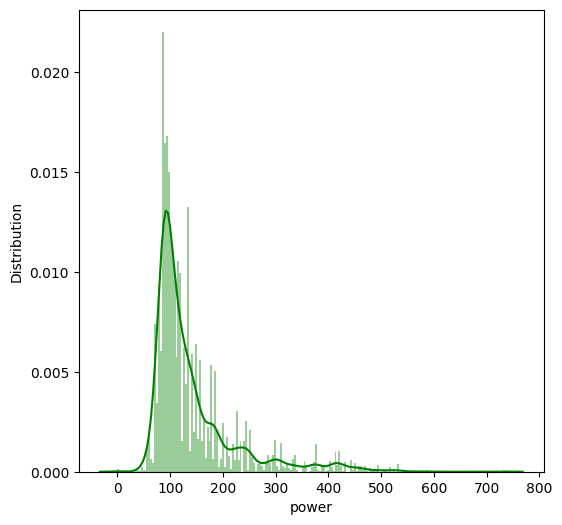

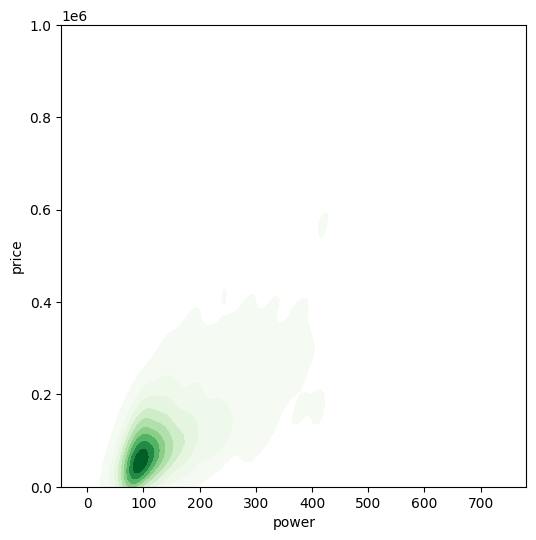

In [8]:
plt.figure(figsize=(6, 6))
sns.distplot(train_data['power'], color='g', bins=200, hist_kws={'alpha': 0.4});
plt.ylabel('Distribution')
plt.savefig("power_dis.svg", format="svg")
plt.show()
plt.figure(figsize=(6, 6))
sns.kdeplot(x='power', y='price', data=train_data, fill=True, cmap="Greens")
plt.ylim(0, 1000000) 
plt.savefig("power_dis2.svg", format="svg")
# 显示图形
plt.show()

C:\Users\echo\AppData\Local\Temp\ipykernel_14264\436054222.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['coe'], color='g', bins=200, hist_kws={'alpha': 0.4});


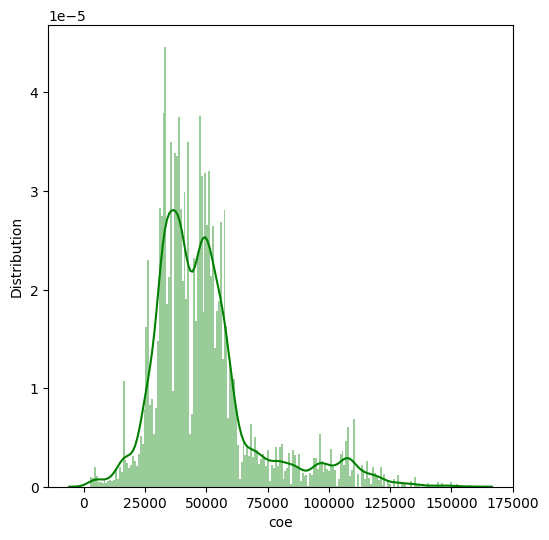

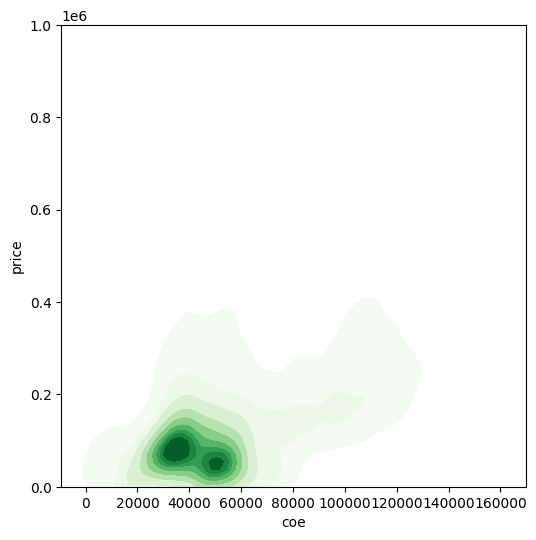

In [10]:
plt.figure(figsize=(6, 6))
sns.distplot(train_data['coe'], color='g', bins=200, hist_kws={'alpha': 0.4});
plt.ylabel('Distribution')
plt.savefig("coe_dis.svg", format="svg")
plt.show()
plt.figure(figsize=(6, 6))
sns.kdeplot(x='coe', y='price', data=train_data, fill=True, cmap="Greens")
plt.ylim(0, 1000000) 
plt.savefig("coe_dis2.svg", format="svg")
# 显示图形
plt.show()

C:\Users\echo\AppData\Local\Temp\ipykernel_14264\1899331274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='no_of_owners', y='price', data=train_data,palette='Set2',showfliers=False)


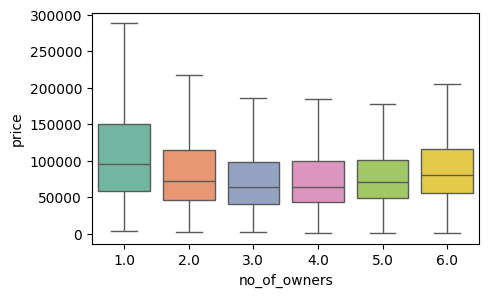

In [11]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='no_of_owners', y='price', data=train_data,palette='Set2',showfliers=False)
plt.xlabel('no_of_owners')
plt.ylabel('price')
plt.savefig("owners_dis.svg", format="svg")
plt.show()

C:\Users\echo\AppData\Local\Temp\ipykernel_14264\804698496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='manufactured', y='fuel_type', data=train_data, palette='Set2',fliersize=2)
C:\Users\echo\AppData\Local\Temp\ipykernel_14264\804698496.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_labels)


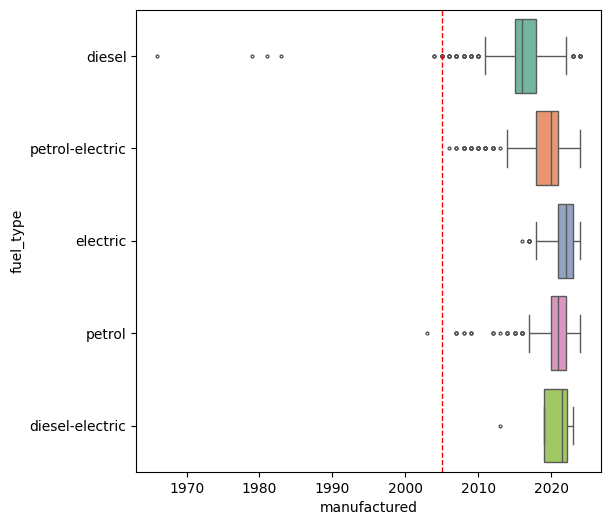

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(x='manufactured', y='fuel_type', data=train_data, palette='Set2',fliersize=2)
specific_x_value = 2005
plt.axvline(x=specific_x_value, color='red', linestyle='--', linewidth=1) 
x_labels = [f'{int(label)}' for label in plt.gca().get_xticks()]
plt.gca().set_xticklabels(x_labels)
plt.xlabel('manufactured')
plt.ylabel('fuel_type')
plt.savefig("fuel_3.svg", format="svg")
plt.show()

C:\Users\echo\AppData\Local\Temp\ipykernel_14264\2068467350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='price', data=train_data,palette='Set2',showfliers=False)


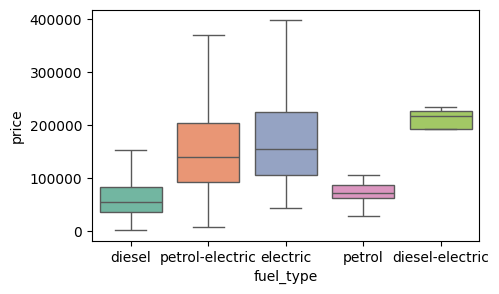

In [13]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='fuel_type', y='price', data=train_data,palette='Set2',showfliers=False)
plt.xlabel('fuel_type')
plt.ylabel('price')
plt.savefig("fuel_dis.svg", format="svg")
plt.show()

C:\Users\echo\AppData\Local\Temp\ipykernel_14264\2168314174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='manufactured', y='price', data=train_data,palette='Set2',showfliers=False)
C:\Users\echo\AppData\Local\Temp\ipykernel_14264\2168314174.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_labels)


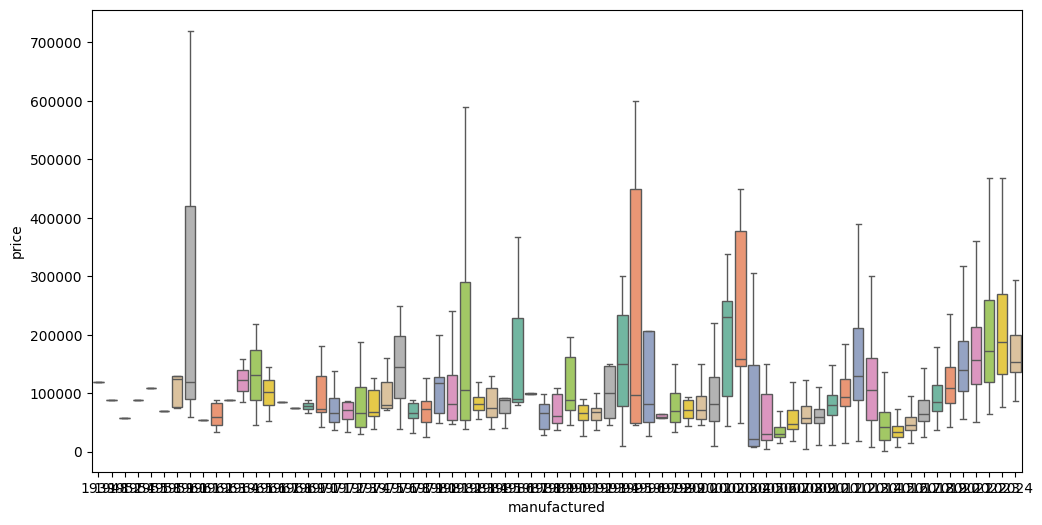

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufactured', y='price', data=train_data,palette='Set2',showfliers=False)
x_labels = [f'{int(label.get_text().split(".")[0])}' for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(x_labels)
plt.xlabel('manufactured')
plt.ylabel('price')
plt.savefig("manufactured_dis.svg", format="svg")
plt.show()

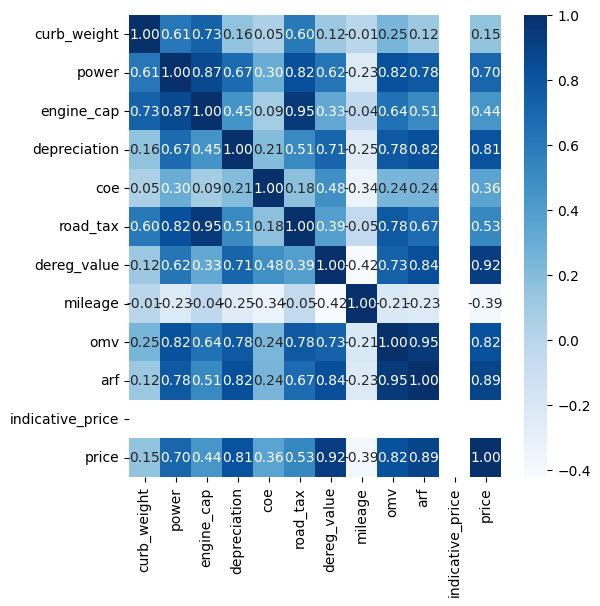

In [15]:
train_data1 = train_data.drop(columns = train_data.select_dtypes(include=['object']))
train_data1.corr()
train_data1=train_data1.drop(columns=['no_of_owners','manufactured'])
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(data=train_data1.corr(),annot=True,cbar=True,fmt='.2f',cmap='Blues')
plt.savefig("corr.svg", format="svg")

C:\Users\echo\AppData\Local\Temp\ipykernel_14264\1435772194.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='make', y='fuel_type', size='count', data=grouped_data, palette='Set2',sizes=(20, 200), alpha=1, legend=False)


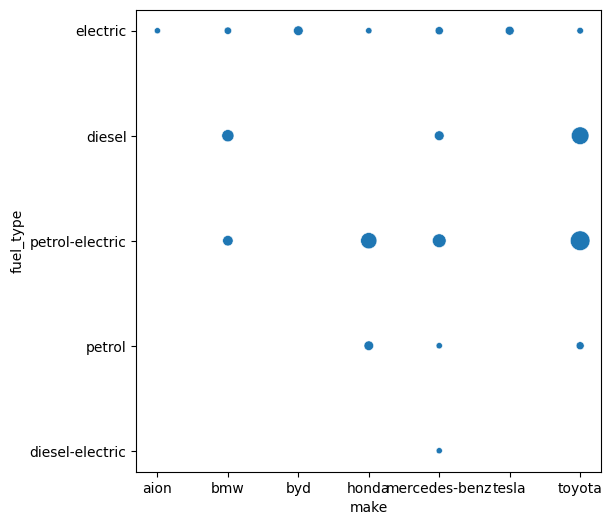

In [16]:
plt.figure(figsize=(6, 6))
train_data2=train_data[train_data['make'].isin(['aion','byd', 'tesla', 'mercedes-benz','toyota','honda','bmw'])]
grouped_data = train_data2.groupby(['make', 'fuel_type']).size().reset_index(name='count')
sns.scatterplot(x='make', y='fuel_type', size='count', data=grouped_data, palette='Set2',sizes=(20, 200), alpha=1, legend=False)
# x_labels = [f'{int(label.get_text().split(".")[0])}' for label in plt.gca().get_xticklabels()]
# plt.gca().set_xticklabels(x_labels)
plt.xlabel('make')
plt.ylabel('fuel_type')
plt.savefig("fuel_4.svg", format="svg")
plt.show()

E:\anaconda\envs\CS5228\lib\site-packages\numpy\lib\_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


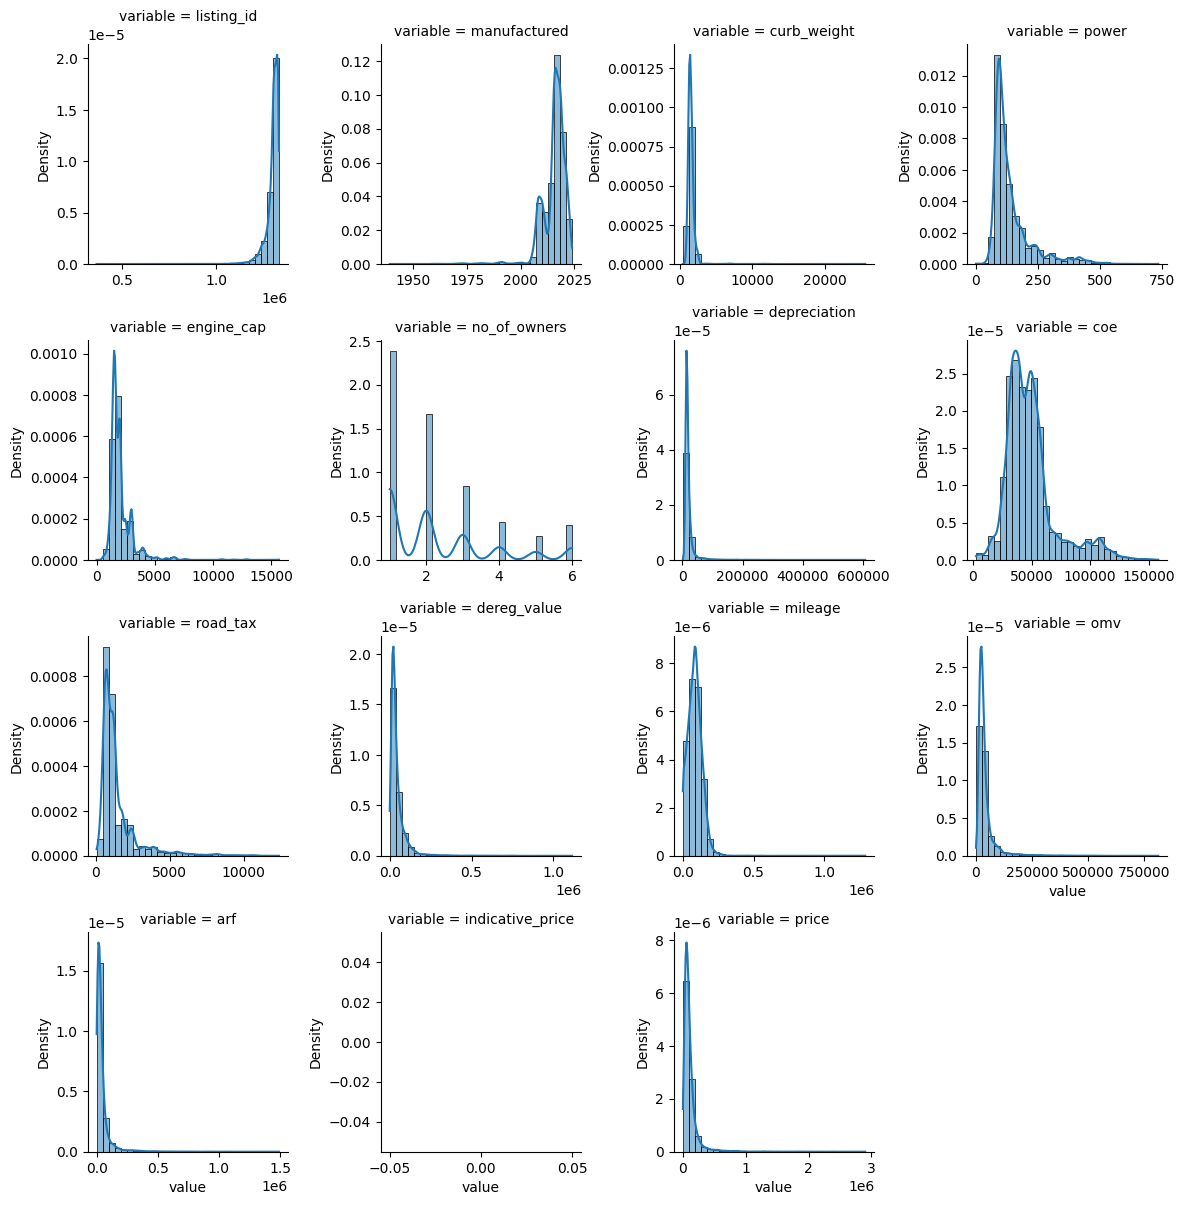

In [17]:
f = pd.melt(train_numerical, value_vars = train_numerical.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.histplot(_x, kde=True, stat="density", bins=30,  **kwargs), 'value')

In [18]:
train_categorical=train_data.select_dtypes(include='object')
train_categorical.head()

,title,make,model,description,original_reg_date,reg_date,type_of_vehicle,category,transmission,fuel_type,opc_scheme,lifespan,eco_category,features,accessories
0,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",NaN,08-mar-2018,suv,parf car,auto,NaN,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear..."
1,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",auto,NaN,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re..."
2,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",auto,NaN,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam..."
3,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",auto,NaN,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r..."
4,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",auto,NaN,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...


In [19]:
all_data=pd.concat([train_data,test_data])
nan_data = (all_data.isnull().sum())*100/all_data.shape[0]
nan_data= nan_data.drop(nan_data[nan_data== 0].index).sort_values(ascending=False)
nan_data
miss_data = pd.DataFrame({'Missing Ratio' :nan_data})
miss_data

,Missing Ratio
indicative_price,100.000000
opc_scheme,99.402857
original_reg_date,98.994286
lifespan,90.562857
fuel_type,76.488571
price,28.571429
mileage,21.342857
accessories,15.368571
power,10.645714
road_tax,10.611429


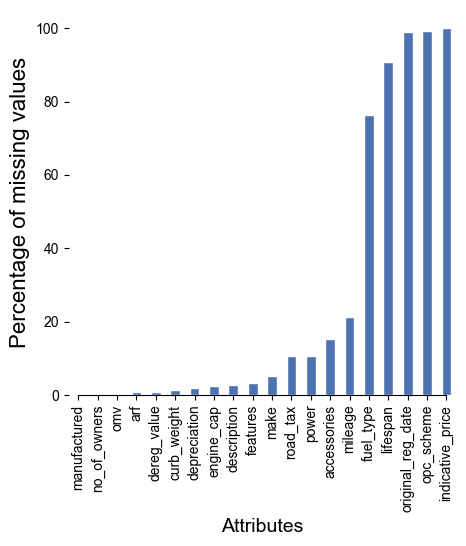

In [20]:
f = plt.figure(figsize=(5,5))
ax1 = plt.subplot(1, 1, 1)
sns.set_style("white")
sns.set_color_codes(palette='deep')
missing = round(train_data.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
ax1.set_ylabel("Percentage of missing values", fontsize=16)
ax1.set_xlabel("Attributes", fontsize=14)
sns.despine(trim=True, left=True)
plt.savefig("train_miss.svg", format="svg")

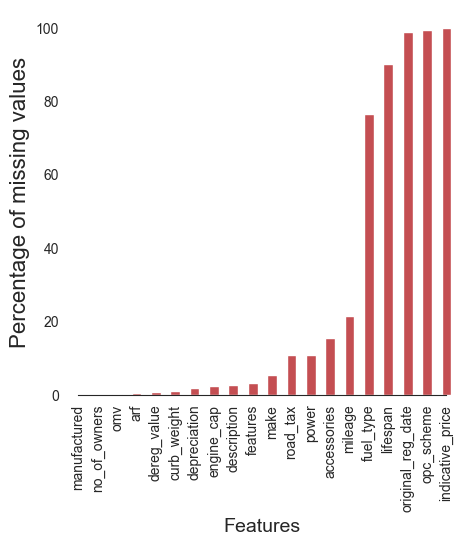

In [21]:
f = plt.figure(figsize=(5,5))
ax2 = plt.subplot(1, 1, 1, sharey=ax1)
sns.set_style("white")
sns.set_color_codes(palette='deep')
missing = round(test_data.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="r")
ax2.set_ylabel("Percentage of missing values", fontsize=16)
ax2.set_xlabel("Features", fontsize=14)
sns.despine(trim=True, left=True)
plt.savefig("test_miss.svg", format="svg")

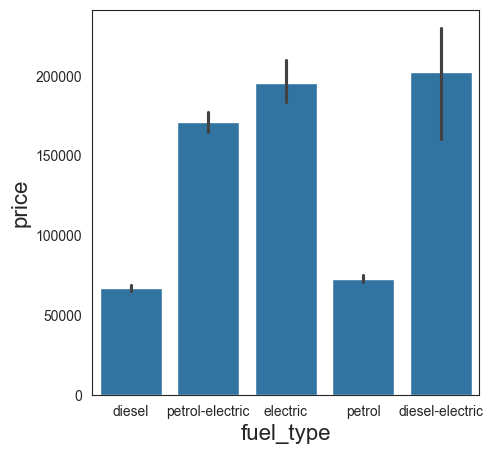

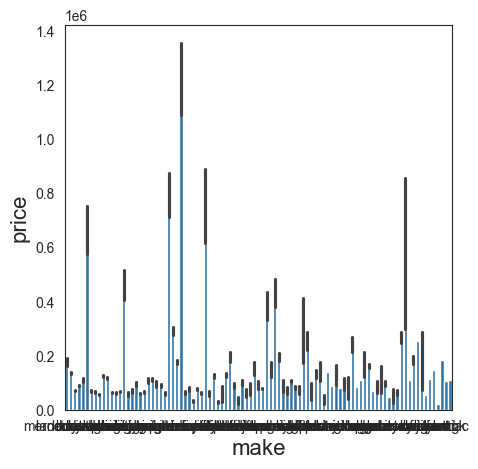

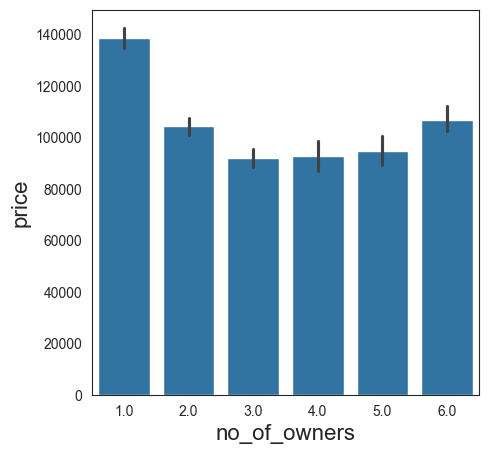

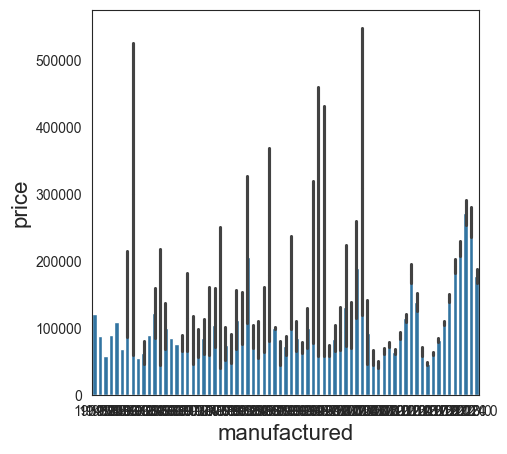

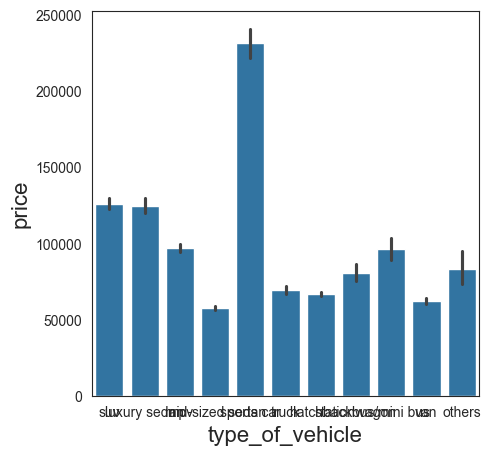

In [22]:
var = ['fuel_type','make','no_of_owners','manufactured','type_of_vehicle']
for v in var:
    f = plt.figure(figsize=(5,5))
    ax1 = plt.subplot(1, 1, 1)
    data = pd.concat([train_data['price'], train_data[v]], axis=1)
    b1 = sns.barplot(x=v, y="price", data=data)
    b1.set_xlabel(v,fontsize=16)
    b1.set_ylabel("price",fontsize=16)

C:\Users\echo\AppData\Local\Temp\ipykernel_14264\4138810707.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  b1 = sns.barplot(x=v, y="fuel_type", data=data,palette='Set2')
C:\Users\echo\AppData\Local\Temp\ipykernel_14264\4138810707.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  b1 = sns.barplot(x=v, y="fuel_type", data=data,palette='Set2')


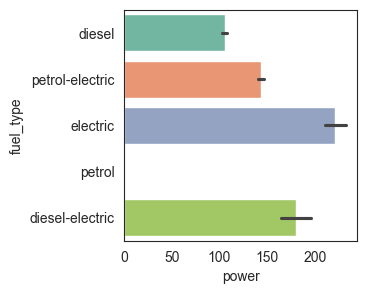

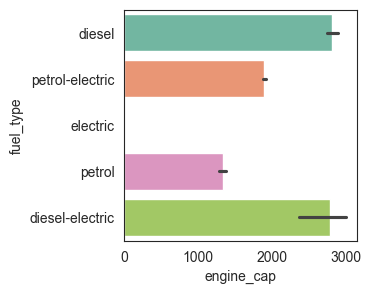

In [23]:
var = ['power','engine_cap']
for v in var:
    f = plt.figure(figsize=(3,3))
    ax1 = plt.subplot(1, 1, 1)
    data = pd.concat([train_data['fuel_type'], train_data[v]], axis=1)
    b1 = sns.barplot(x=v, y="fuel_type", data=data,palette='Set2')
    b1.set_xlabel(v,fontsize=10)
    b1.set_ylabel("fuel_type",fontsize=10)
    if v=='power':
        plt.savefig("fuel_1.svg", format="svg")
    if v=='engine_cap':
        plt.savefig("fuel_2.svg", format="svg")